<h1> Introduction </h1><br>
In this notebook we are comparing ulnar deviation and radial devation movement classes using the signals from channel1. We shall be comparing ulnar deviation of person 5 and radial deviation of person 8 based on features we defined.

Let's import the necessary libraries paths and dictionaries.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import tsfel
import os
import json
import matplotlib.pyplot as plt
from EmgFilter import EMG_Filter

In [2]:
#setting up paths for features
module_path = os.path.join(os.getcwd(),'features.py') 
json_path = os.path.join(os.getcwd(),'features.json')

In [3]:
#loading required tsfel features dictionary from our customised json file
with open('feat_dict1.json', mode='rt') as f:
    dict_feact = json.load(f)

In [4]:
#loading custom feaures dictionary that we implemented 
feat_dict = tsfel.get_features_by_domain('temporal', json_path)

In [5]:
#merging two dictionaries
feat_dict.update(dict_feact)

Now let's select the desired data into dataframes from our EMG dataset.

In [6]:
#building copies of dataframe for person 5 and person 8 respectively
DataFrame= pd.read_csv('EMG-data.csv')
DF_1 = DataFrame[DataFrame.label==5].copy()
DF_1.rename(columns={'class':'group'}, inplace=True) 
DF_2 = DataFrame[DataFrame.label==8].copy()
DF_2.rename(columns={'class':'group'}, inplace=True) 

In [7]:
#selecting desired classes of each person ie class 5 for person 5 and class 6 for person 8
#here class 5 represents ulnar deviation and class 6 represents radial deviation
DF1 = DF_1[DF_1.group==5].copy()
DF2 = DF_2[DF_2.group==6].copy()

In [8]:
#setting time as index and selecting signals from channel1
DF1.set_index('time',inplace = True)
DF2.set_index('time',inplace = True)
DF1 = DF1[['channel1']].copy()
DF2 = DF2[['channel1']].copy()

Our signal from channel 1 are ready in dataframes. Now lets filter the signals before extracting the features.

In [9]:
DF1_f = EMG_Filter(DF1,high_band=30, low_band=450, n_channels = 1) #filtering the signals between 30Hz and 450 Hz.
DF2_f = EMG_Filter(DF2,high_band=30, low_band=450, n_channels = 1) #filtering the signals between 30Hz and 450 Hz.

Now the signlas are filtered. Lets calculate the features.

In [10]:
#Features for ulnar deviation of person 5
Features1 = tsfel.time_series_features_extractor(feat_dict, DF1_f, fs=1000, window_spliter = True, window_size=50, features_path =module_path)
#Features for radial deviation of person 8
Features2 = tsfel.time_series_features_extractor(feat_dict, DF2_f, fs=1000, window_spliter = True, window_size=50, features_path =module_path)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Now lets plot the features to make comparisons among ulnar deviation and radial deviation.

Text(0.5, 0.98, 'Label8 Class6 histogram')

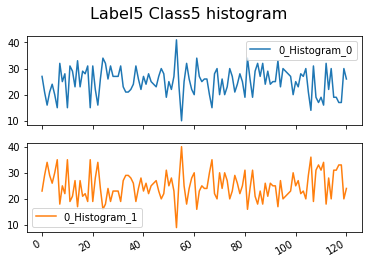

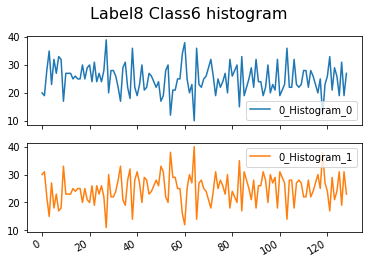

In [11]:
#Histogram
Features1.plot(y=['0_Histogram_0', '0_Histogram_1'], subplots = True)
plt.suptitle('Label5 Class5 histogram', fontsize=16)
Features2.plot(y=['0_Histogram_0', '0_Histogram_1'], subplots = True)
plt.suptitle('Label8 Class6 histogram', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 IAV & SSI')

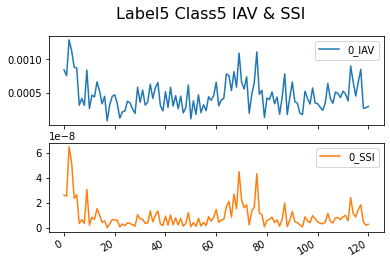

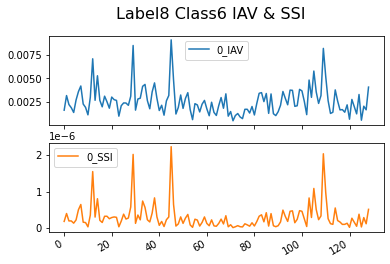

In [12]:
#IAV and SSI
Features1.plot(y= ['0_IAV', '0_SSI'], subplots = True)
plt.suptitle('Label5 Class5 IAV & SSI', fontsize=16)
Features2.plot(y= ['0_IAV', '0_SSI'], subplots = True)
plt.suptitle('Label8 Class6 IAV & SSI', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 LPCC')

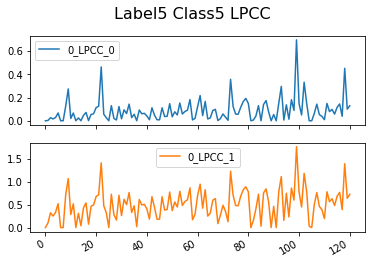

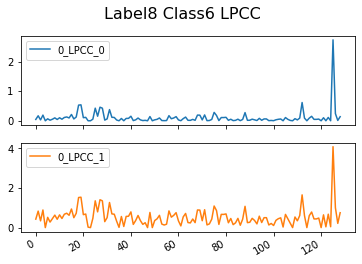

In [13]:
#LPCC
Features1.plot(y=['0_LPCC_0', '0_LPCC_1'], subplots=True)
plt.suptitle('Label5 Class5 LPCC', fontsize=16)
Features2.plot(y=['0_LPCC_0', '0_LPCC_1'], subplots=True)
plt.suptitle('Label8 Class6 LPCC', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 MAV & RMS')

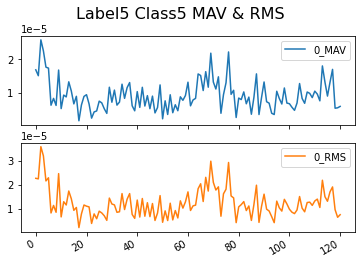

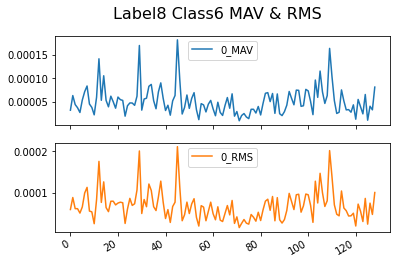

In [14]:
#MAV and RMS
Features1.plot(y=['0_MAV', '0_RMS'], subplots=True)
plt.suptitle('Label5 Class5 MAV & RMS ', fontsize=16)
Features2.plot(y=['0_MAV', '0_RMS'], subplots=True)
plt.suptitle('Label8 Class6 MAV & RMS', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 MFCC')

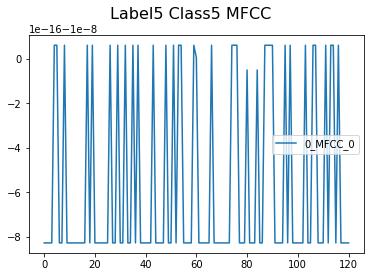

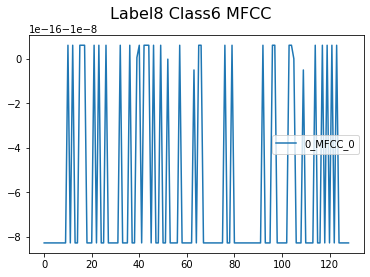

In [15]:
#MFCC
Features1.plot(y=['0_MFCC_0'])
plt.suptitle('Label5 Class5 MFCC', fontsize=16)
Features2.plot(y=['0_MFCC_0'])
plt.suptitle('Label8 Class6 MFCC', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 slope & var')

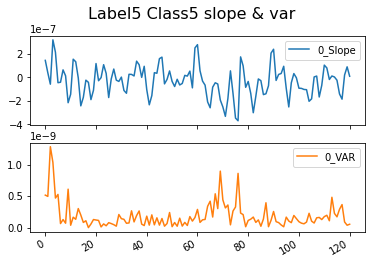

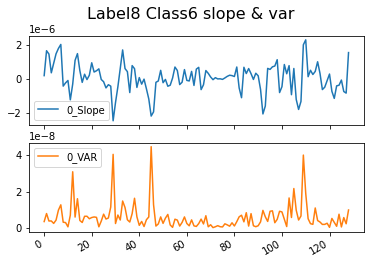

In [16]:
#Slope and variance
Features1.plot(y=['0_Slope', '0_VAR'], subplots=  True)
plt.suptitle('Label5 Class5 slope & var', fontsize=16)
Features2.plot(y=['0_Slope', '0_VAR'], subplots=  True)
plt.suptitle('Label8 Class6 slope & var', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 cross & spectral slope')

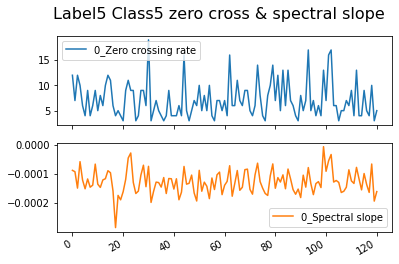

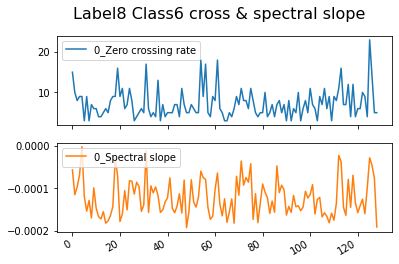

In [17]:
#Spectral slope and Zero crossing
Features1.plot(y = ['0_Zero crossing rate', '0_Spectral slope'], subplots=  True)
plt.suptitle('Label5 Class5 zero cross & spectral slope', fontsize=16)
Features2.plot(y=['0_Zero crossing rate', '0_Spectral slope'], subplots=  True)
plt.suptitle('Label8 Class6 cross & spectral slope', fontsize=16)